In [1]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
# 1. 빈 데이터프레임 생성
DataFrame()

""


In [3]:
# 2. 데이터프레임 생성하고 데이터 할당하기
df=DataFrame(data=[[1,2,3],['kim','park','lee']]
            ,index=['A','B'],columns=['X','Y','Z'])
df

,X,Y,Z
A,1,2,3
B,kim,park,lee


In [4]:
# 3. 사전 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
        '대전':[50, 151, 145],
        '대구':[85, 88, 92],
        '부산':[180, 187, 192],
        '광주':[74, 80, 80]
      }

In [5]:
df2=DataFrame(data=인구통계,index=[2018,2019,2020])
df2

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [6]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df2.index

Int64Index([2018, 2019, 2020], dtype='int64')

In [7]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df2.columns

Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')

In [8]:
#3. values : 데이터프레임의 데이터 반환 (ndarray)
df2.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [9]:
type(df2.values)

numpy.ndarray

In [10]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df2.shape

(3, 5)

In [11]:
df2

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [12]:
#5. T (Transpose) : 행과 열을 바꾸기.
df2.T

,2018,2019,2020
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [13]:
#6. axes : 행과 열 이름을 리스트로 반환
df2.axes

[Int64Index([2018, 2019, 2020], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [14]:
#7. dtypes : 컬럼별 데이터타입 반환
df2.dtypes

서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object

In [15]:
#8. size : DataFrame의 원소의 개수를 반환
df2.size

15

### 2.2.3. 데이터프레임 기본 함수

In [16]:
#1. info() - 기본 정보 출력
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      3 non-null      float64
 1   대전      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   부산      3 non-null      int64  
 4   광주      3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 252.0 bytes


In [17]:
#2. describe() - 기본 통계 정보 출력
df2.describe()

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [18]:
# 통계 함수 (mean, sum, max, min, ...)
df2.max()
df2.mean()
df2.mean(axis=1)

2018    267.8
2019    290.2
2020    289.5
dtype: float64

In [19]:
# 3. sample() - 일부 데이터를 랜덤으로 선택
df2.sample(2)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [20]:
# 4. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
df2.head(2)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [21]:
# 5. nunique() - unique한 값의 개수
df2.nunique(axis=1,dropna=False)

2018    5
2019    5
2020    5
dtype: int64

<AxesSubplot:>

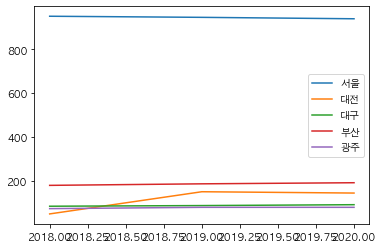

In [22]:
# 6. plot() - 데이터 시각화 
import matplotlib as plt
plt.rcParams['font.family']='AppleGothic'
df2.plot()

In [23]:
# 7. filter() - 원하는 데이터만 선택 
df2.filter(['서울'])
df2.filter([2019],axis=0)

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80


In [24]:
#정규 표현식 활용
df2.filter(regex='^대') #'대'로 시작하는 컬럼만 선택
# 2010년대 데이터만 선택 (2010_2019 데이터 중)
df2.filter(regex='^201' ,axis=0)
#10년 단위의 연도 정보만 선택(2000,2010,2020,...)
df2.filter(regex='0$',axis=0)

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


# 3-3차시

### 2.2.3. 데이터프레임 조회하기

In [25]:
# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [26]:
# 1. 원하는 열(컬럼)만 조회하기
# 1-1) Class만 조회하기
df4[['Class']]

,Class
C01,IoT
C02,Network
C03,Economy
C04,Big Data
C05,Cloud


In [27]:
# 1-2) Class와 Price 조회하기
df4[['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


In [28]:
# 2. 원하는 행(로우)만 조회하기 
df4.loc['C03']

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [29]:
# 3. 인덱스 슬라이싱 
#슬라이싱은 loc,iloc 생략가능
#기본적으로 컬럼 먼저 탐색 -> 컬럼 인덱스는ㄴ 순서 없어 -> 슬라이싱 불가능
df2.loc[2018:2019]

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [30]:
df4['C02':'C04'] #슬라이싱은 loc 안써도 가능

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [31]:
df4.iloc[1:4]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [32]:
# 4. 원하는 행과 열을 선택하여 조회하기 
# C02, C03 강의의 Class와 Year만 조회
df4.loc[['C02','C03']][['Class','Year']]
df4[['Class','Year']].loc[['C02','C03']]
df4['C02':'C03'][['Class','Year']]
df4.loc[['C02','C03'],['Class','Year']]
df4.loc['C02':'C03','Class':'Year'] #loc 이용하면 컬럼인덱스로 슬라이싱 가능
df4.loc[:,'Class':'Price']

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132
C04,Big Data,2018,312
C05,Cloud,2019,250


In [33]:
# 5. 조건 색인 
df4[[True,True,False,False,True]]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C05,Cloud,2019,250,Korea


In [34]:
df4[df4['Price']>=200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [35]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 선택
df4[['Year']]

,Year
C01,2018
C02,2017
C03,2018
C04,2018
C05,2019


In [36]:
# 실습 2. 'Class'와 'Location' 컬럼만 선택
df4[['Class','Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [37]:
# 실습 3. C01과 C03 강의의 모든 컬럼 선택
df4.loc[['C01','C03']]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [38]:
# 실습 4. C01~C03 강의의 Class와 Price만 선택
df4.loc['C01':'C03','Class':'Price']

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132


In [39]:
# 실습 4. 2019년도 강의만 조회
df4[df4['Year']==2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [40]:
# 실습 5. 가장 가격이 비싼 강의 정보만 조회
df4[df4.Price==df4.Price.max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [41]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
df4[df4.Year ==2018].append(df4[df4.Year ==2019])
#df4[df4[df4.Year ==2018] or df4[df4.Year ==2019]]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [42]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
df4[df4.Year==2018][df4.Location=='Korea']

<ipython-input-42-c0bd347ac995>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4.Year==2018][df4.Location=='Korea']


,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [43]:
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


# 4-1차시

### 1. 데이터프레임에 새로운 컬럼 추가하기

In [44]:
# 컬럼 추가하기 1
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
df4['limitStudent']=30

In [45]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
df4['numStudent']=[25,30,10,23,17]
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [46]:
# 컬럼 추가하기 3 (기존 컬럼에 함수를 적용한 결과로 값을 할당하기)
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low
def get_level(X):
    if X>=200:
        return 'High'
    else:
        return 'Low'

df4#df4[ df4['Price']>=200 'high' ; 'low']

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [47]:
df4.apply(lambda X: X.sum())

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               150
numStudent                                 105
dtype: object

In [48]:
df4['PriceLevel']=df4.apply(lambda X: get_level(X.Price), axis=1)

In [49]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [50]:
# 컬럼 추가하기 4 (기존 컬럼을 이용하여 새 컬럼 추가하기)
# income 컬럼을 추가하고, Price와 numStudent의 값을 곱한 값으로 할당
df4['income']= df4.Price * df4.numStudent
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income
C01,IoT,2018,100,Korea,30,25,Low,2500
C02,Network,2017,125,Korea,30,30,Low,3750
C03,Economy,2018,132,Korea,30,10,Low,1320
C04,Big Data,2018,312,US,30,23,High,7176
C05,Cloud,2019,250,Korea,30,17,High,4250


In [51]:
#산술연산

In [52]:
#1 두 값의 연산
5+10

15

In [53]:
#2 1차원 데이터와 값 간의 연산
sr=Series([3,5,7,9])

In [54]:
sr+100

0    103
1    105
2    107
3    109
dtype: int64

In [55]:
# 실습. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
# 충원율은 정원(limitStudent) 대비 수강학생수(numStudent) 비율
df4['rate']=df4.numStudent/df4.limitStudent*100

In [56]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,High,4250,56.666667


In [57]:
df4.round(0)

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.0
C02,Network,2017,125,Korea,30,30,Low,3750,100.0
C03,Economy,2018,132,Korea,30,10,Low,1320,33.0
C04,Big Data,2018,312,US,30,23,High,7176,77.0
C05,Cloud,2019,250,Korea,30,17,High,4250,57.0


### 2. 불필요한 컬럼이나 데이터 삭제하기

In [58]:
#drop()
#첫번째 인자: 삭제하고자 하는 인덱스명
#두번째 인자: axis (0 or 1)

In [59]:
#C05 강의 삭제
df4.drop('C05',0)

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667


In [60]:
df4.drop('PriceLevel',1)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,30,25,2500,83.333333
C02,Network,2017,125,Korea,30,30,3750,100.000000
C03,Economy,2018,132,Korea,30,10,1320,33.333333
C04,Big Data,2018,312,US,30,23,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,4250,56.666667


In [61]:
df4[df4.numStudent==df4.numStudent.min()]

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
